# Characteristics

In [22]:
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats.contingency import association
import seaborn as sns

In [23]:
def cramersv(a, b):
    return association(contingency_matrix(a, b))

In [24]:
df = pd.read_csv('data/caracteristics.csv', encoding='latin1')

<ipython-input-24-9b4bedd28ad2>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/caracteristics.csv', encoding='latin1')


In [25]:
def fill_with_most_common(df, column_name):
  most_common_value = df[column_name].mode()[0]
  df[column_name].fillna(most_common_value, inplace=True)

In [26]:
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590


In [27]:
df.rename(columns={'an': 'Year', 'mois': 'Month', 'jour': 'Day', 'hrmn': 'Time', 'lum': 'Lighting',
                   'dep': 'Department', 'com': 'Municipality', 'agg': 'Localisation', 'int': 'Intersection',
                   'atm': 'Atmospheric conditions', 'col': 'Collision type', 'adr': 'Address'}, inplace=True)

In [28]:
df.head()

,Num_Acc,Year,Month,Day,Time,Lighting,Localisation,Intersection,Atmospheric conditions,Collision type,Municipality,Address,gps,lat,long,Department
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590


## Year



Year of the accident

In [29]:
df['Year'].value_counts()

Year
5     87026
7     83850
6     82993
8     76767
9     74409
10    69379
11    66974
12    62250
14    59854
16    59432
15    58654
13    58397
Name: count, dtype: int64

In [30]:
df['Year'].isna().sum()

0

## Month



Month of the accident

In [31]:
df['Month'].value_counts()

Month
10    79559
6     78372
9     76977
7     74466
11    72645
5     72443
12    68816
4     67430
3     65630
1     64662
8     62401
2     56584
Name: count, dtype: int64

In [32]:
df['Month'].isna().sum()

0

## Day



Day of the accident

In [33]:
df['Day'].value_counts()

Day
10    28693
6     28667
7     28576
12    28462
9     28345
8     28325
16    28094
4     28058
5     28054
15    28031
19    27970
11    27956
14    27891
3     27868
21    27797
18    27682
13    27600
17    27552
22    27447
20    27433
23    27417
2     27334
28    26927
24    26718
1     26485
27    26447
26    26177
25    26155
30    25502
29    25308
31    15014
Name: count, dtype: int64

In [34]:
df['Day'].isna().sum()

0

## Holiday columns prep

In [35]:
holiday_df = pd.read_csv('data/holidays.csv', encoding='latin1')

In [36]:
holiday_df['holiday'].value_counts()

holiday
New year                        12
Easter Monday                   12
Labour Day                      12
Ascension Thursday              12
Victory in Europe Day           12
Whit Monday                     12
Bastille Day                    12
Assumption of Mary to Heaven    12
All Saints Day                  12
Armistice Day                   12
Christmas Day                   12
Name: count, dtype: int64

In [37]:
# Convert ds column in holidays_df to datetime
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])

for holiday in holiday_df['holiday'].unique():
    df[holiday] = 0

In [38]:
# Add 2000 to the 'Year' column
df['Year'] += 2000
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Holiday'] = 0

In [40]:
holiday_map = {row['ds']: row['holiday'] for _, row in holiday_df.iterrows()}

for index, date in df['Date'].items():
    if date in holiday_map:
        holiday_name = holiday_map[date]
        df.at[index, holiday_name] = 1
        df.at[index, 'Holiday'] = 1

In [41]:
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [42]:
df.columns

Index(['Num_Acc', 'Time', 'Lighting', 'Localisation', 'Intersection',
       'Atmospheric conditions', 'Collision type', 'Municipality', 'Address',
       'gps', 'lat', 'long', 'Department', 'New year', 'Easter Monday',
       'Labour Day', 'Ascension Thursday', 'Victory in Europe Day',
       'Whit Monday', 'Bastille Day', 'Assumption of Mary to Heaven',
       'All Saints Day', 'Armistice Day', 'Christmas Day', 'Date', 'Holiday'],
      dtype='object')

## Time



Time of the accident in hour and minutes (hhmm)

In [43]:
df['Time'].value_counts()

Time
1800    13090
1730    11722
1700    11611
1830    11322
1900    10238
        ...  
434         6
334         6
559         6
322         5
527         5
Name: count, Length: 1439, dtype: int64

In [44]:
df['Time'].isna().sum()

0

New category instead of time: **Time of day**

1 - Night (11 pm to 4 am)

2 - Dawn (4 am to 6 am)

3 - Morning (6 am to noon)

4 - Afternoon (noon to 6 pm)

5 - Evening (6 pm to 11 pm)

In [45]:
def map_time(time):
    if 2300 <= time < 400:
        return 1  # Night
    elif 400 <= time < 600:
        return 2  # Dawn
    elif 600 <= time < 1200:
        return 3  # Morning
    elif 1200 <= time < 1800:
        return 4  # Afternoon
    else:
        return 5  # Evening

df['Time_of_day'] = df['Time'].apply(map_time)
df.drop(['Time'], axis=1, inplace=True)

## Lighting

Lighting conditions in which the accident occurred

1 - Full day

2 - Twilight or dawn

3 - Night without public lighting

4 - Night with public lighting not lit

5 - Night with public lighting on

In [46]:
df['Lighting'].value_counts()

Lighting
1    576861
5    141279
3     65811
2     49140
4      6894
Name: count, dtype: int64

In [47]:
df['Lighting'].isna().sum()

0

### NEW ORDER

Light 1-5, 1 being well lit, 5 being no light!

1 - Full day

2 - Night with public lighting on

3 - Twilight or dawn

4 - Night with public lighting not lit

5 - Night without public lighting

In [48]:
mapping = {
    2: 3, # Twilight or dawn is nr 3 instead of 2
    3: 5, # Night without public lighting is nr 5 instead of 3
    5: 2  # Night with public lighting on is nr 2 instead of 5
}

df['Lighting'] = df['Lighting'].replace(mapping)

In [49]:
df['Lighting'].value_counts()

Lighting
1    576861
2    141279
5     65811
3     49140
4      6894
Name: count, dtype: int64

## Localisation & Address


**Localisation**

1 - Out of agglomeration

2 - In built-up areas

In [50]:
df['Localisation'].value_counts()

Localisation
2    576166
1    263819
Name: count, dtype: int64

In [51]:
df['Localisation'].isna().sum()

0

**Address**

Postal address: variable filled in for accidents occurring in built-up areas

In [52]:
df['Address'].value_counts()

Address
AUTOROUTE A1                2816
AUTOROUTE A86               2495
A4                          2244
A13                         2164
AUTOROUTE A6                1990
                            ... 
49, QUAI FRANCOIS MAURIA       1
34, BOULEVARD ARAGO            1
angle, BOULEVARD MASSENA       1
19, PLACE JEANNE D ARC         1
TOULOUSE(AVENUE)               1
Name: count, Length: 364688, dtype: int64

In [53]:
df['Address'].isna().sum()

140542

Address row is useless

In [54]:
df.drop('Address', axis=1, inplace=True)

## Intersection

Type of Intersection:

1 - Out of intersection

2 - Intersection in X

3 - Intersection in T

4 - Intersection in Y

5 - Intersection with more than 4 branches

6 - Giratory

7 - Place

8 - Level crossing

9 - Other intersection

In [55]:
df['Intersection'].value_counts()

Intersection
1    599652
2    103008
3     73774
6     22358
9     13247
4     11481
5      9364
7      6075
8       920
0       106
Name: count, dtype: int64

In [56]:
df['Intersection'].isna().sum()

0

## Atmospheric conditions

Atmospheric conditions:

1 - Normal

2 - Light rain

3 - Heavy rain

4 - Snow - hail

5 - Fog - smoke

6 - Strong wind - storm

7 - Dazzling weather

8 - Cloudy weather

9 - Other

In [57]:
df['Atmospheric conditions'].value_counts()

Atmospheric conditions
1.0    680577
2.0     87150
8.0     27317
3.0     18082
7.0      7879
9.0      6298
5.0      5485
4.0      5151
6.0      1991
Name: count, dtype: int64

In [58]:
df['Atmospheric conditions'].isna().sum()

55

In [59]:
fill_with_most_common(df, 'Atmospheric conditions')

## Collision type

Type of collision:

1 - Two vehicles - frontal

2 - Two vehicles - from the rear

3 - Two vehicles - by the side

4 - Three vehicles and more - in chain

5 - Three or more vehicles - multiple collisions

6 - Other collision

7 - Without collision

In [60]:
df['Collision type'].value_counts()

Collision type
6.0    277153
3.0    242732
2.0     96778
7.0     87688
1.0     83491
5.0     26873
4.0     25259
Name: count, dtype: int64

In [61]:
df['Collision type'].isna().sum()

11

In [62]:
fill_with_most_common(df, 'Collision type')

## Municipality

The commune number is a code given by INSEE. The code has 3 numbers set to the right.

In [63]:
df['Municipality'].value_counts()

Municipality
55.0     32563
88.0     13982
7.0      10646
63.0     10176
113.0     9895
         ...  
952.0        1
925.0        1
892.0        1
878.0        1
847.0        1
Name: count, Length: 924, dtype: int64

In [64]:
df['Municipality'].isna().sum()

2

In [65]:
fill_with_most_common(df, 'Municipality')

## Department



INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed by a 0 (201 Corse-du-Sud - 202 Haute-Corse)

In [66]:
df['Department'].value_counts()

Department
750    87482
130    52188
930    33810
920    31261
940    29389
       ...  
90      1272
150     1012
230      953
480      949
976      542
Name: count, Length: 101, dtype: int64

In [67]:
df['Department'].isna().sum()

0

## gps

**GPS coding: 1 originator character:**

M = Métropole

A = Antilles (Martinique or Guadeloupe)

G = Guyane

R = Réunion

Y = Mayotte

In [68]:
df['gps'].value_counts()

gps
M    352824
A      6545
R      4161
G      2349
Y       329
0         9
S         4
T         2
C         2
P         1
Name: count, dtype: int64

In [69]:
df['gps'].isna().sum()

473759

In [70]:
df.drop('gps', axis=1, inplace=True)

## Lon & Lat

In [71]:
df['long'].value_counts()

long
0.0          105356
0             32301
-              3209
345699.0        154
247391.0         41
              ...  
-150982.0         1
-148092.0         1
-153343.0         1
-149269.0         1
6086700.0         1
Name: count, Length: 142013, dtype: int64

In [72]:
df['long'].isna().sum()

477518

In [73]:
df['lat'].value_counts()

lat
0.0          117839
4.0           22481
5.0             406
4881740.0        60
4881750.0        57
              ...  
4811298.0         1
4815684.0         1
4854475.0         1
4807827.0         1
4322423.0         1
Name: count, Length: 112591, dtype: int64

In [74]:
df['lat'].isna().sum()

477514

In [75]:
print('Correct long coordinates:')
df.shape[0]-df['long'].isna().sum() - len(df[df['long'] == 0.0]) - len(df[df['long'] == '0']) - len(df[df['long'] == '-'])

Correct long coordinates:


221601

In [76]:
print('Correct lat coordinates:')
df.shape[0]-df['lat'].isna().sum() - len(df[df['lat'] == 0.0])

Correct lat coordinates:


244632

In [77]:
df.drop('long', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)

## Holidays

I don't think we should keep if the event was on a specific holiday. We should only store if it was a holiday or not.

In [81]:
cols = list(df.columns)
cols[8:19]

['New year',
 'Easter Monday',
 'Labour Day',
 'Ascension Thursday',
 'Victory in Europe Day',
 'Whit Monday',
 'Bastille Day',
 'Assumption of Mary to Heaven',
 'All Saints Day',
 'Armistice Day',
 'Christmas Day']

In [83]:
df.drop(cols[8:19], axis=1, inplace=True)

# Result

In [84]:
df.head()

,Num_Acc,Lighting,Localisation,Intersection,Atmospheric conditions,Collision type,Municipality,Department,Date,Holiday,Time_of_day
0,201600000001,1,2,1,8.0,3.0,5.0,590,2016-02-01,0,4
1,201600000002,1,2,6,1.0,6.0,5.0,590,2016-03-16,0,5
2,201600000003,1,1,1,1.0,6.0,11.0,590,2016-07-13,0,5
3,201600000004,3,2,1,7.0,3.0,477.0,590,2016-08-15,1,5
4,201600000005,1,2,3,1.0,3.0,11.0,590,2016-12-23,0,3


In [85]:
df.to_csv('data/characteristics_prepped.csv', index=False)

### Correlation

In [96]:
cols = list(df.columns)
cols = cols[1:6] + cols[8:]
cols

['Lighting',
 'Localisation',
 'Intersection',
 'Atmospheric conditions',
 'Collision type',
 'Date',
 'Holiday',
 'Time_of_day']

<Axes: >

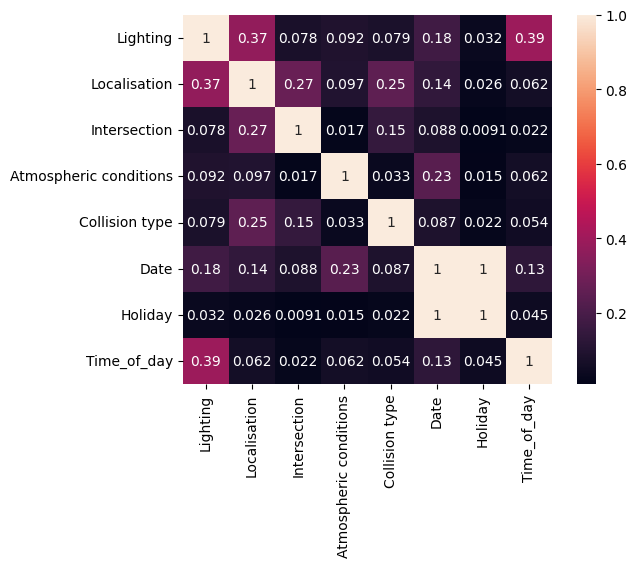

In [97]:
corr = df[cols].corr(method=cramersv, numeric_only=False)
sns.heatmap(corr, square=True, annot=True)

In [98]:
df.shape

(839985, 11)

# Notes

## Bad news

- **Municipality** or 'Commune number' is not really usable. Not sure what extra info could it give us, other than the place specificly. Commune number is to be used with Department to identify the specific commune. Usually needed to identify a certain address.

- **Address:** Very specific. A LOT of different addresses. I don't think we need this column

- **Department:** Practically postal code. Maybe keep only this, so we have a rough idea where it is, but commune number is too detailed in my opinion.

- **gps:** Missing for half of the data. Not sure what to fill the null values with (maybe add a placeholder category for the null values or yeet the column to the trash)

- **lon-lat:** About 230 000 are filled out correctly. Less then a quarter of the database. Coordinates should be yeeted in my opinion. Or at least normalized, and a placeholder value for the null/incorrect ones.


## Time

Maybe we should make an additional column which contains (yymmdd) number. Then maybe we could embed this continuity in the data itself. I would still keep month and day because they are useful for determining holidays, or to recognise spikes within the year.

## Categoric parameters

I would introduce dummy columns for most of the categoric data (except if it has something to do with space/time/continuity that can be expressed using numbers.
